In [ ]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv('movies.csv')

In [162]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
# Lets see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [150]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [168]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

# Here we find some values Na or inf, we need to clean these values


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [156]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [194]:
#Drop non applicable values from the data and convert to int64
df.dropna(subset=['budget'], inplace=True)
df['budget'] = df['budget'].astype('int64')

df.dropna(subset=['gross'], inplace=True)
df['gross'] = df['gross'].astype('int64')

df.dropna(subset=['votes'], inplace=True)
df['votes'] = df['votes'].astype('int64')

df.dropna(subset=['name'], inplace=True)
df['name'] = df['name'].astype('string')

#date_only = date_object.date()



#df['released'] = pd.to_datetime(df['released'])

# Change the format to 'yyyy-mm-dd'
#df['released'] = df['released'].dt.strftime('%Y-%m-%d')

df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,NaT
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,NaT
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,NaT
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,NaT
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,NaT
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,NaT
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,NaT
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,NaT
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,NaT
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,NaT


In [196]:
#df.drop('yearcorrect', axis=1, inplace=True)
df.drop('released_year', axis=1, inplace=True)

In [198]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [200]:
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [202]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [84]:
pd.set_option('display.max_rows', None)

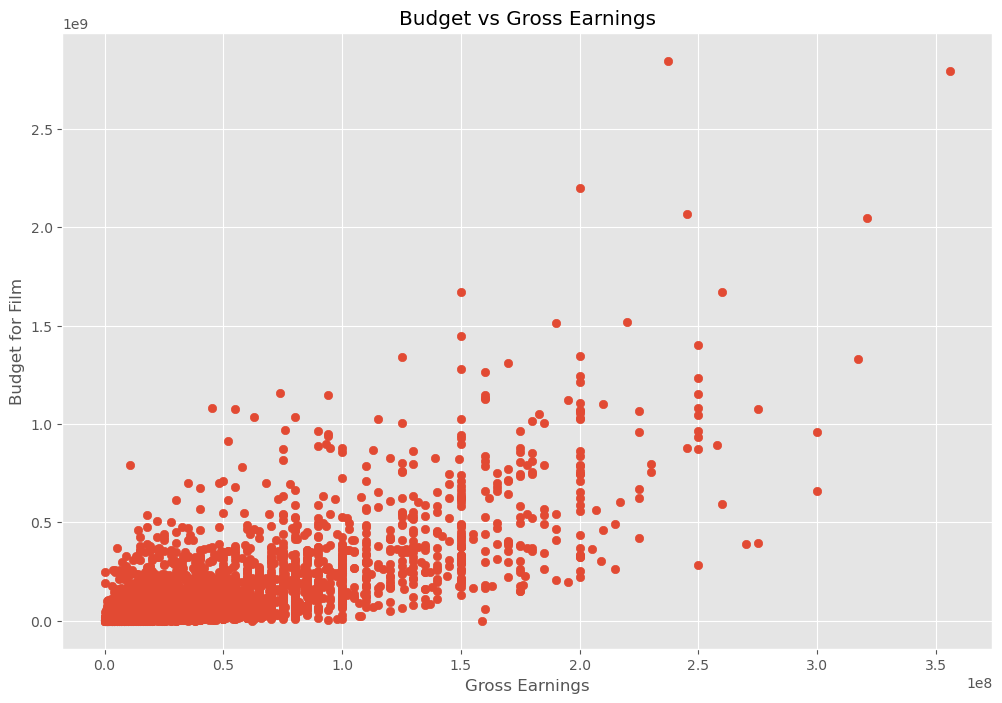

In [204]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [100]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

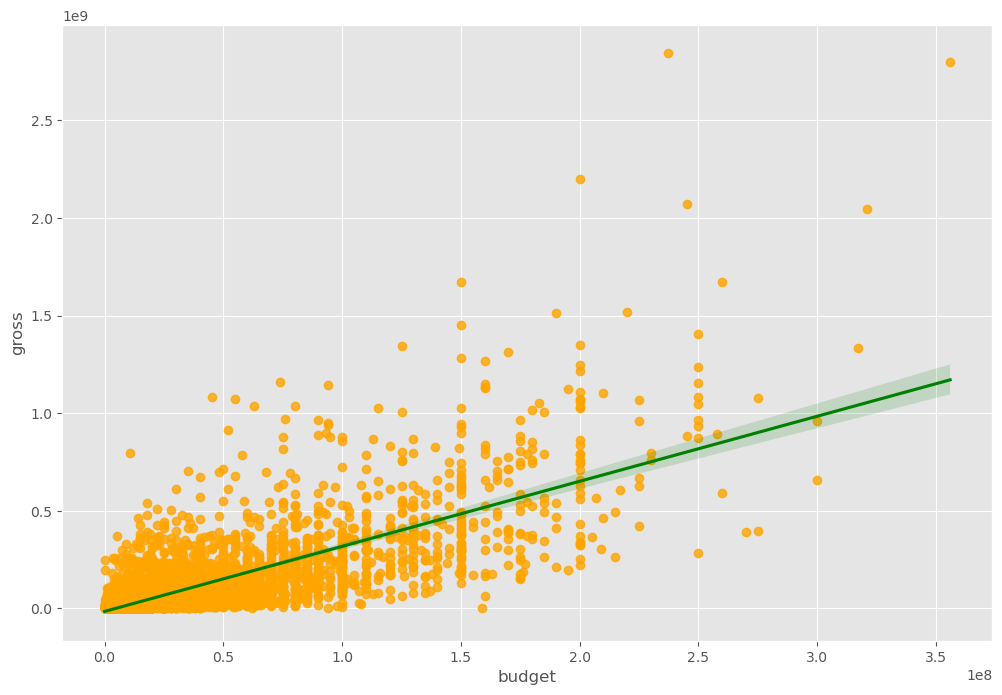

In [206]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "orange"}, line_kws={"color":"green"})

In [ ]:
# Lets start looking at correlation

In [210]:
df['name'] = pd.to_numeric(df['name'], errors='coerce')


df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized
df.corr(method='spearman') #pearson, kendall, spearman

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.542720,0.069953,-0.332575,0.054545,0.068970,0.090909,-0.236364,-0.054545,0.432803,-0.202260,0.081818,0.181818,-0.054795,0.481818
rating,0.542720,1.000000,0.162471,-0.016212,0.031521,0.083677,-0.009704,0.007742,0.000980,0.018153,-0.007232,-0.260078,-0.249700,-0.105273,0.109176
genre,0.069953,0.162471,1.000000,-0.080276,0.021636,0.061102,-0.183444,-0.008231,0.015165,0.002900,-0.017114,-0.373538,-0.269070,-0.082276,-0.041123
year,-0.332575,-0.016212,-0.080276,1.000000,-0.001985,0.056269,0.426571,-0.036140,-0.026312,-0.033431,-0.071875,0.313199,0.350679,-0.007777,0.094396
released,0.054545,0.031521,0.021636,-0.001985,1.000000,0.042370,0.006767,0.003818,0.008435,0.015044,-0.021315,-0.000787,-0.026691,0.001645,0.017115
score,0.068970,0.083677,0.061102,0.056269,0.042370,1.000000,0.495379,0.013312,0.013447,0.008823,-0.126607,-0.010133,0.182857,0.014447,0.413040
votes,0.090909,-0.009704,-0.183444,0.426571,0.006767,0.495379,1.000000,-0.001891,-0.001457,-0.010515,0.011065,0.493404,0.745815,0.161285,0.300959
director,-0.236364,0.007742,-0.008231,-0.036140,0.003818,0.013312,-0.001891,1.000000,0.263720,0.036026,-0.007647,-0.003410,-0.012620,-0.008813,0.004135
writer,-0.054545,0.000980,0.015165,-0.026312,0.008435,0.013447,-0.001457,0.263720,1.000000,0.019302,0.018657,-0.021671,-0.014783,-0.003248,-0.031321
star,0.432803,0.018153,0.002900,-0.033431,0.015044,0.008823,-0.010515,0.036026,0.019302,1.000000,-0.013502,-0.016393,-0.009505,0.012508,0.004787


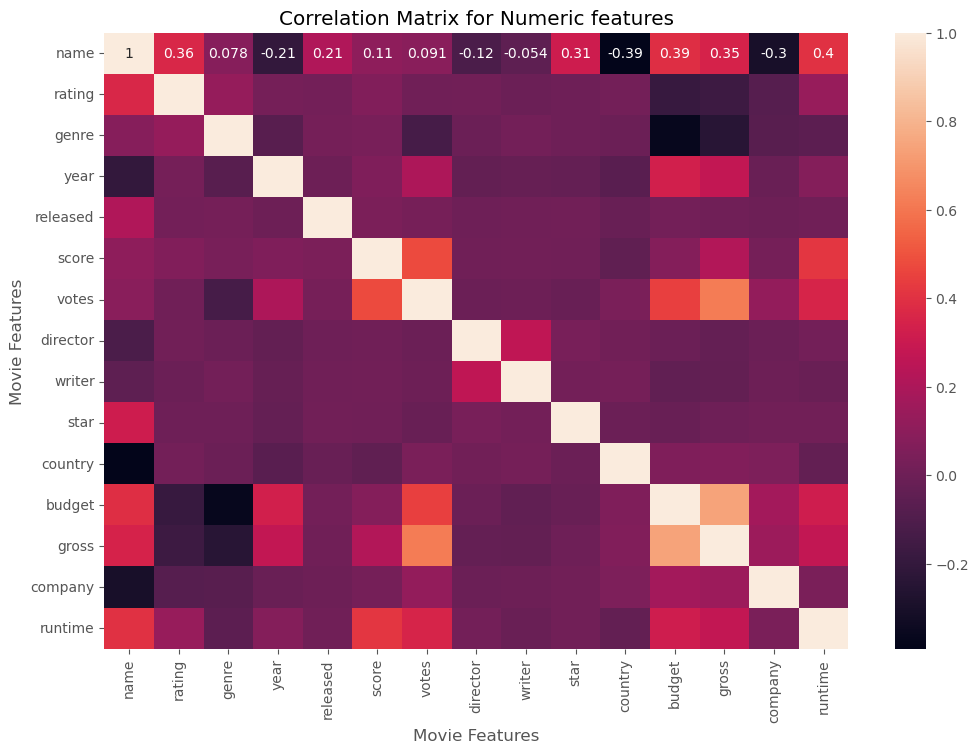

In [212]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [214]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,<NA>,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0
7445,<NA>,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0
3045,<NA>,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0
6663,<NA>,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0
7244,<NA>,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0


In [220]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,<NA>,5,0,2009,528,7.8,1100000,787,1265,1538,47,237000000,2847246203,1388,162.0
7445,<NA>,5,0,2019,138,8.4,903000,106,515,1474,47,356000000,2797501328,987,181.0
3045,<NA>,5,6,1997,535,7.8,1100000,787,1265,1076,47,200000000,2201647264,1388,194.0
6663,<NA>,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138.0
7244,<NA>,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149.0
7480,<NA>,4,2,2019,1130,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118.0
6653,<NA>,5,0,2015,1307,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124.0
6043,<NA>,5,0,2012,1905,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143.0
6646,<NA>,5,0,2015,166,7.1,370000,811,483,1792,47,190000000,1515341399,1403,137.0
7494,<NA>,4,2,2019,2059,6.8,148000,279,1386,1039,47,150000000,1450026933,1428,103.0


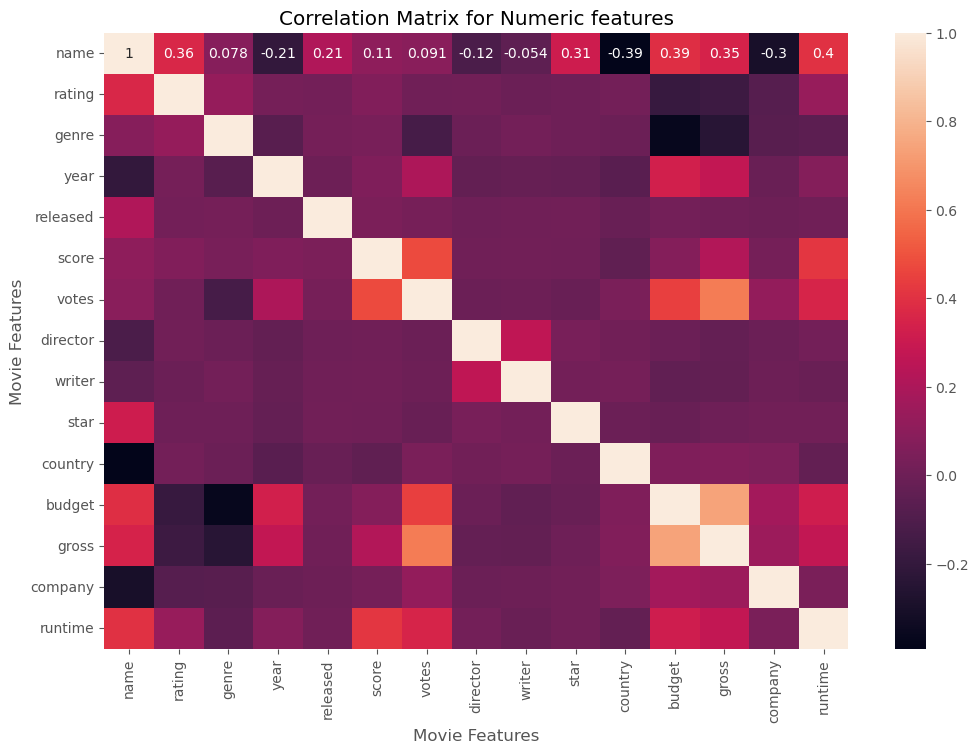

In [222]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [224]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.362018,0.077608,-0.206283,0.214944,0.106637,0.090561,-0.116848,-0.053972,0.313048,-0.392341,0.390134,0.345848,-0.304958,0.401284
rating,0.362018,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.077608,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,-0.206283,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,0.214944,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.008614,-0.002927,0.008619
score,0.106637,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.090561,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,-0.116848,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,-0.053972,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,0.313048,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


In [232]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating      0.362018
          genre       0.077608
          year       -0.206283
          released    0.214944
          score       0.106637
          votes       0.090561
          director   -0.116848
          writer     -0.053972
          star        0.313048
          country    -0.392341
          budget      0.390134
          gross       0.345848
          company    -0.304958
          runtime     0.401284
rating    name        0.362018
          rating      1.000000
          genre       0.128102
          year        0.022668
          released    0.018836
          score       0.059550
          votes       0.009255
          director    0.014847
          writer     -0.006923
          star        0.003737
          country     0.020148
          budget     -0.186892
          gross      -0.168814
          company    -0.082189
          runtime     0.133239
genre     name        0.077608
          rating      0.128102
        

In [238]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

country   name       -0.392341
name      country    -0.392341
budget    genre      -0.368900
genre     budget     -0.368900
name      company    -0.304958
company   name       -0.304958
genre     gross      -0.244380
gross     genre      -0.244380
name      year       -0.206283
year      name       -0.206283
budget    rating     -0.186892
rating    budget     -0.186892
          gross      -0.168814
gross     rating     -0.168814
votes     genre      -0.136457
genre     votes      -0.136457
director  name       -0.116848
name      director   -0.116848
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073293
company   genre      -0.073293
genre     year       -0.073026
year      genre      -0.073026
country   year       -0.066662
year      country    -0.066662
runtime   genre      -0.060186
genre     runtime    -0.060186
name      writer     -0.053972
writer    name       -0.053972
score     country    -0.044690
country   score      -0.044690
writer  